<a href="https://colab.research.google.com/github/sathasivamn/EDA-2-Data-Preprocessing-and-Feature-Engineering/blob/main/Assignment_12_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - 2
## Data Preprocessing and Feature Engineering
### 1. Data Exploration
### 2. Feature Scaling
### 3. Encoding Techniques
### 4. Feature Engineering
### 5. Feature Selection
### 6. Interview Questions - Answers

In [1]:
# Install required packages
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall pandas

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Usi

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps

In [3]:
# Load the dataset
df = pd.read_csv("adult_with_headers.csv")

# 1. Data Exploration
### Checking the missing values and summary statistics.
### Handling the missing values

In [5]:
# 1. Data Exploration

print("Initial Data Overview:")
print(df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

Initial Data Overview:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40

In [6]:
# Handle Missing Values

# Replace ? with NaN and drop rows with missing values
df.replace(" ?", np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 2. Feature Scaling
### Identify numeric columns
### Applying Standard Scaling and Min-Max Scaling

In [7]:
# 2. Feature Scaling

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [8]:
# Standard Scaling
standard_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[numeric_cols] = standard_scaler.fit_transform(df_std_scaled[numeric_cols])

In [9]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = minmax_scaler.fit_transform(df_minmax_scaled[numeric_cols])

print("\nStandard Scaled Data Preview:\n", df_std_scaled[numeric_cols].head())
print("\nMin-Max Scaled Data Preview:\n", df_minmax_scaled[numeric_cols].head())


Standard Scaled Data Preview:
         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.042796 -1.062722       1.128918      0.146092     -0.218586   
1  0.880288 -1.007871       1.128918     -0.147445     -0.218586   
2 -0.033340  0.244693      -0.439738     -0.147445     -0.218586   
3  1.108695  0.425240      -1.224066     -0.147445     -0.218586   
4 -0.794697  1.406658       1.128918     -0.147445     -0.218586   

   hours_per_week  
0       -0.077734  
1       -2.331531  
2       -0.077734  
3       -0.077734  
4       -0.077734  

Min-Max Scaled Data Preview:
         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.043338       0.800000       0.02174           0.0   
1  0.452055  0.047277       0.800000       0.00000           0.0   
2  0.287671  0.137244       0.533333       0.00000           0.0   
3  0.493151  0.150212       0.400000       0.00000           0.0   
4  0.150685  0.220703       0.800000       0.00000           0.0   


### Comments:
#### Standard Scaling is preferred for data with Gaussian distribution or when using distance-based models.
#### Min-Max Scaling is preferred for models that are sensitive to the scale like Neural Networks.

# 3. Encoding Techniques
### Identifying categorical column
### count the unique value
### Apply encodings

In [11]:
# 3. Encoding Techniques

# Categorical column identification
cat_cols = df.select_dtypes(include=['object']).columns

In [12]:
# Count unique values
cat_counts = df[cat_cols].nunique()

In [13]:
# Apply encodings
df_encoded = df.copy()
for col in cat_cols:
    if cat_counts[col] <= 5:
        df_encoded = pd.get_dummies(df_encoded, columns=[col])
    else:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

print("\nEncoded Data Preview:\n", df_encoded.head())


Encoded Data Preview:
    age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          5   77516          9             13               4   
1   50          4   83311          9             13               2   
2   38          2  215646         11              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          9             13               2   

   occupation  relationship  capital_gain  capital_loss  ...  native_country  \
0           0             1          2174             0  ...              38   
1           3             0             0             0  ...              38   
2           5             1             0             0  ...              38   
3           5             0             0             0  ...              38   
4           9             5             0             0  ...               4   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  

### Pros/Cons:
#### One-Hot Encoding avoids ordinal assumption but increases dimensionality.
#### Label Encoding is compact but can mislead models into thinking there's a hierarchy.

# 4. Feature Engineering
### Creating new features
### Log transform skewed feature
### Visualize skew

In [28]:
# 4. Feature Engineering

# Create 2 new features
df_encoded['hours_per_education'] = df['hours_per_week'] / (df['education_num'] + 1)
df_encoded['age_bucket'] = pd.cut(df['age'], bins=[15, 25, 45, 65, 100], labels=[1, 2, 3, 4])


In [21]:
# Log transform skewed feature
df_encoded['capital_gain_log'] = np.log1p(df['capital_gain'])

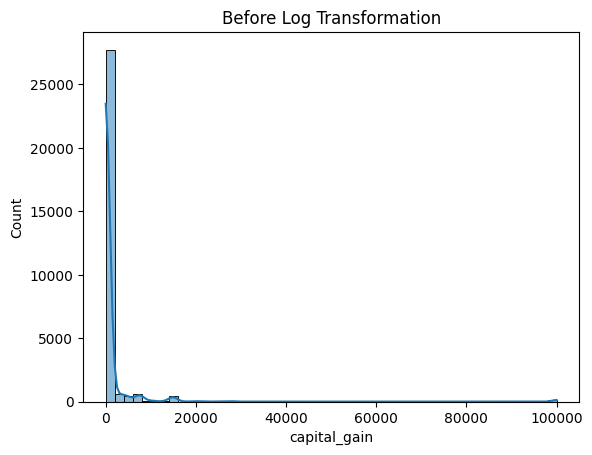

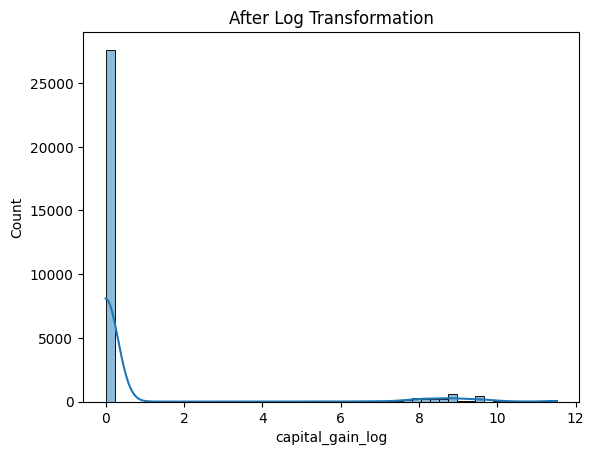

In [22]:
# Visualize skew
sns.histplot(df['capital_gain'], bins=50, kde=True).set(title="Before Log Transformation")
plt.show()

sns.histplot(df_encoded['capital_gain_log'], bins=50, kde=True).set(title="After Log Transformation")
plt.show()

# 5. Feature Selection
### Isolation Forest for outlier detection
### Applying PPS Matrix
### Displaying the predictive relationship
### Correlation Matrix

In [23]:
# 5. Feature Selection

# Isolation Forest for outlier detection
iso = IsolationForest(contamination=0.01)
outliers = iso.fit_predict(df_encoded[numeric_cols])
df_cleaned = df_encoded[outliers == 1]

print(f"\nRemoved {len(df_encoded) - len(df_cleaned)} outliers using Isolation Forest.")


Removed 302 outliers using Isolation Forest.


In [24]:
# PPS Matrix
pps_matrix = pps.matrix(df_cleaned)
pps_matrix_filtered = pps_matrix[pps_matrix['x'] != pps_matrix['y']]

In [25]:
# Display top predictive relationships
top_pps = pps_matrix_filtered.sort_values(by="ppscore", ascending=False).head(10)
print("\nTop Predictive Power Scores:\n", top_pps[['x', 'y', 'ppscore']])


Top Predictive Power Scores:
                     x                 y   ppscore
476     income_ <=50K      income_ >50K  1.000000
499      income_ >50K     income_ <=50K  1.000000
426       sex_ Female         sex_ Male  1.000000
449         sex_ Male       sex_ Female  1.000000
76          education     education_num  1.000000
99      education_num         education  1.000000
22                age        age_bucket  1.000000
215      capital_gain  capital_gain_log  0.999611
560  capital_gain_log      capital_gain  0.997669
352       race_ Black       race_ White  0.757506


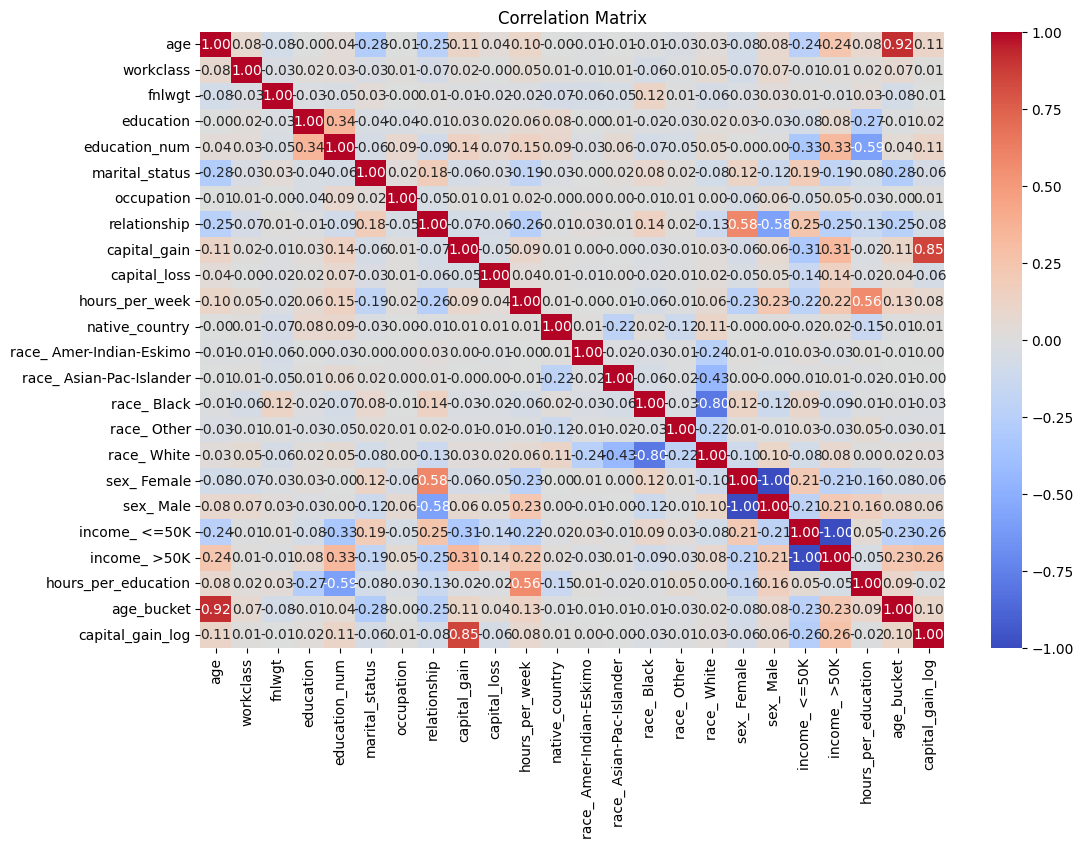

In [26]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Comments:
#### PPS helps identify non-linear predictive power between variables, unlike correlation which captures only linear relationships.

In [42]:
# 6. Interview Questions - Answers

print("\nInterview Questions and Answers:")

# 1. When to use Standard Scaling vs Min-Max Scaling?
print("\n1. When to use Standard Scaling vs Min-Max Scaling?")
print("-Use Standard Scaling when the data follows a normal distribution (for linear models, SVM, PCA).")
print("-Use Min-Max Scaling for neural networks or when input values must be bounded (e.g., between 0 and 1)")

# 2. One-Hot Encoding vs Label Encoding - Pros/Cons?
print("\n2. One-Hot Encoding vs Label Encoding - Pros/Cons?")
print("-One-Hot is safer for non-ordinal categories but increases dimensionality.")
print("-Label Encoding is memory-efficient but can introduce order assumptions.")

# 3. Why use log transformation?
print("\n3. Why use log transformation?")
print("-Log transforms reduce skewness in features like capital-gain, making them more suitable for models that assume normality.")

# 4. How do outliers affect performance?
print("\4. How do outliers affect performance?")
print("-Outliers distort scales, reduce generalization, and mislead models—removing them improves robustness.")


Interview Questions and Answers:

1. When to use Standard Scaling vs Min-Max Scaling?
-Use Standard Scaling when the data follows a normal distribution (for linear models, SVM, PCA).
-Use Min-Max Scaling for neural networks or when input values must be bounded (e.g., between 0 and 1)

2. One-Hot Encoding vs Label Encoding - Pros/Cons?
-One-Hot is safer for non-ordinal categories but increases dimensionality.
-Label Encoding is memory-efficient but can introduce order assumptions.

3. Why use log transformation?
-Log transforms reduce skewness in features like capital-gain, making them more suitable for models that assume normality.
. How do outliers affect performance?
-Outliers distort scales, reduce generalization, and mislead models—removing them improves robustness.


# Interview Questions - Answers

# 1. When to use Standard Scaling vs Min-Max Scaling?

### Use Standard Scaling when the data follows a normal distribution (for linear models, SVM, PCA).
### Use Min-Max Scaling for neural networks or when input values must be bounded (e.g., between 0 and 1)

# 2. One-Hot Encoding vs Label Encoding - Pros/Cons?
### One-Hot is safer for non-ordinal categories but increases dimensionality.
### Label Encoding is memory-efficient but can introduce order assumptions.

# 3. Why use log transformation?
### Log transforms reduce skewness in features like capital-gain, making them more suitable for models that assume normality.

# 4. How do outliers affect performance?
### Outliers distort scales, reduce generalization, and mislead models—removing them improves robustness.